In [4]:
# Importing tensorflow
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Importing some more libraries
import numpy as np
import matplotlib.pyplot as plt

#loading the images
all_images = np.loadtxt('fashion-mnist_train.csv',\
                  delimiter=',', skiprows=1)[:,1:]
#looking at the shape of the file
print(all_images.shape)

Instructions for updating:
non-resource variables are not supported in the long term
(60000, 784)


the array of the first image looks like [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   4.   0.   0.   0.   0.   0.  62.  61.  21.  29.
  23.  51. 136.  61.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  88. 201. 228. 225. 255. 115.  62.
 137. 255. 235. 222. 255. 135.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  47. 252. 234. 238. 224. 215. 215. 229. 108.
 180. 207. 214. 224. 231. 249. 254.  45.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   0.   0. 214. 222. 210. 213. 224. 225. 217. 220. 254.
 233. 219. 221. 217. 223. 221. 240. 2

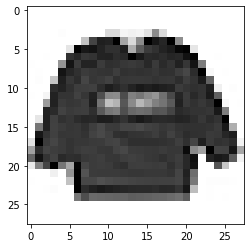

In [2]:
# printing the array representation of the first image
print("the array of the first image looks like", all_images[0])
# printing something that actually looks like an image
print("and the actual image looks like")
plt.imshow(all_images[0].reshape(28,28),  cmap='Greys')
plt.show()

In [6]:
# Deciding how many nodes wach layer should have
n_nodes_inpl = 784  #encoder
n_nodes_hl1  = 32  #encoder
n_nodes_hl2  = 32  #decoder
n_nodes_outl = 784  #decoder

In [7]:
# first hidden layer has 784*32 weights and 32 biases
hidden_1_layer_vals = {'weights':tf.Variable(tf.random.normal([n_nodes_inpl,n_nodes_hl1])),'biases':tf.Variable(tf.random.normal([n_nodes_hl1]))}
# second hidden layer has 32*32 weights and 32 biases
hidden_2_layer_vals = {'weights':tf.Variable(tf.random.normal([n_nodes_hl1, n_nodes_hl2])),'biases':tf.Variable(tf.random.normal([n_nodes_hl2]))}
# second hidden layer has 32*784 weights and 784 biases
output_layer_vals = {'weights':tf.Variable(tf.random.normal([n_nodes_hl2,n_nodes_outl])),'biases':tf.Variable(tf.random.normal([n_nodes_outl]))}

In [8]:
# image with shape 784 goes in
input_layer = tf.placeholder("float", [None, 784])
# multiply output of input_layer wth a weight matrix and add biases
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(input_layer,hidden_1_layer_vals['weights']),hidden_1_layer_vals['biases']))
# multiply output of layer_1 wth a weight matrix and add biases
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,hidden_2_layer_vals['weights']),hidden_2_layer_vals['biases']))
# multiply output of layer_2 wth a weight matrix and add biases
output_layer = tf.matmul(layer_2,output_layer_vals['weights']) + output_layer_vals['biases']
# output_true shall have the original image for error calculations
output_true = tf.placeholder("float", [None, 784])
# define our cost function
meansq =    tf.reduce_mean(tf.square(output_layer - output_true))
# define our optimizer
learn_rate = 0.1   # how fast the model should learn
optimizer = tf.train.AdagradOptimizer(learn_rate).minimize(meansq)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
# initialising stuff and starting the session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# defining batch size, number of epochs and learning rate
batch_size = 100  # how many images to use together for training
hm_epochs =50    # how many times to go through the entire dataset
tot_images = 60000 # total number of images
# running the model for a 10 epochs taking 100 images in batches
# total improvement is printed out after each epoch
for epoch in range(hm_epochs):
    epoch_loss = 0    # initializing error as 0
    for i in range(int(tot_images/batch_size)):
        epoch_x = all_images[ i*batch_size : (i+1)*batch_size ]
        _, c = sess.run([optimizer, meansq],\
               feed_dict={input_layer: epoch_x, \
               output_true: epoch_x})
        epoch_loss += c
print('Epoch', epoch, '/', hm_epochs, 'loss:',epoch_loss)

Epoch 49 / 50 loss: 1760931.3024902344


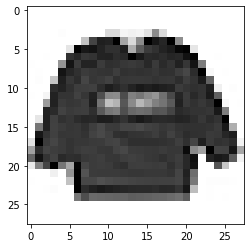

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


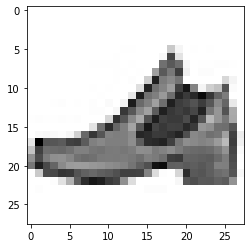

[[0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 0. 1. 1. 1. 1. 1. 1.]]


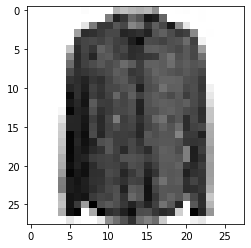

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


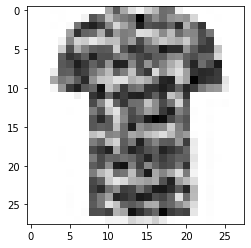

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


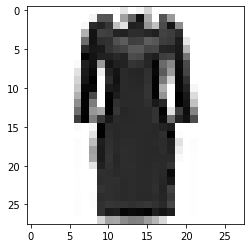

[[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1.]]


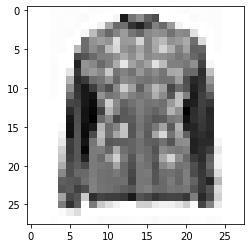

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 0. 1. 1.]]


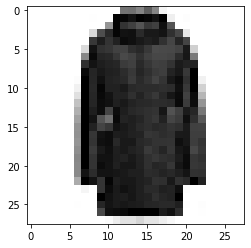

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1.]]


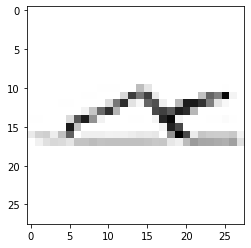

[[1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
  0. 1. 1. 0. 1. 0. 1. 1.]]


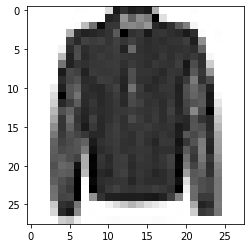

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


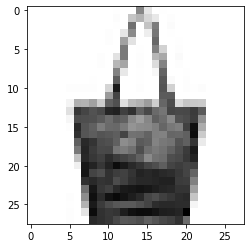

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
  0. 0. 1. 0. 1. 1. 1. 1.]]


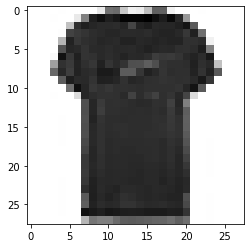

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


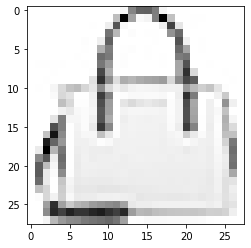

[[0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 0. 1.]]


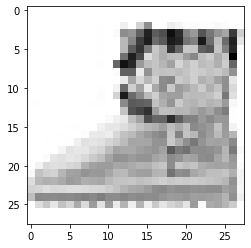

[[0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.
  0. 0. 1. 1. 1. 1. 1. 1.]]


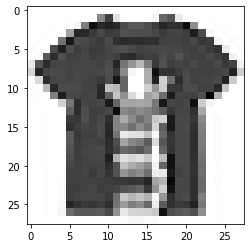

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


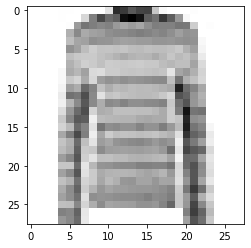

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 0. 1. 1.]]


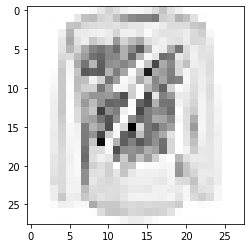

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


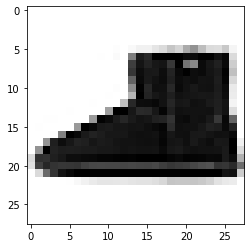

[[0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


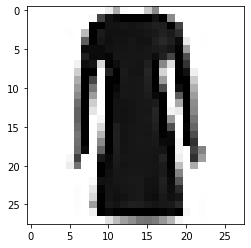

[[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1.]]


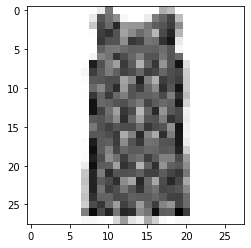

[[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1.]]


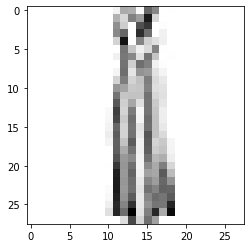

[[0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


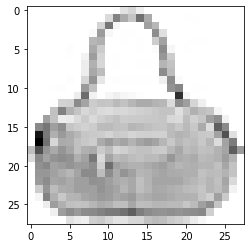

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1.
  0. 0. 1. 1. 1. 0. 1. 1.]]


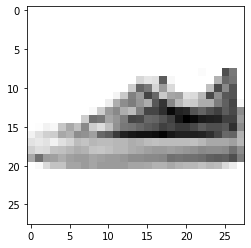

[[0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 0. 1. 0. 1. 1. 0. 1.]]


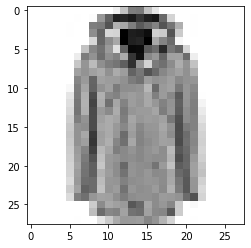

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  1.9810692e-28 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00]]


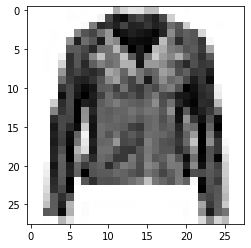

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  3.8163042e-31 1.0000000e+00 1.0000000e+00 1.0000000e+00 5.1104724e-03
  1.0000000e+00 1.0000000e+00]]


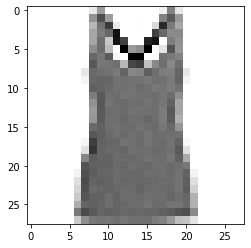

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1.]]


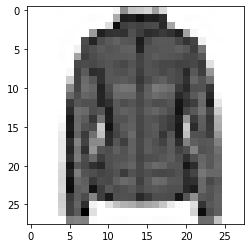

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


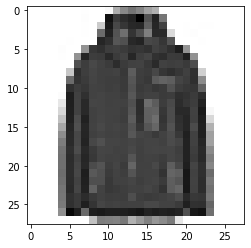

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  0. 0. 1. 1. 1. 1. 1. 1.]]


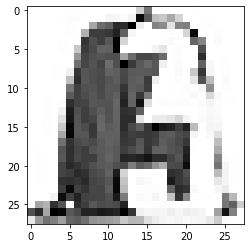

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


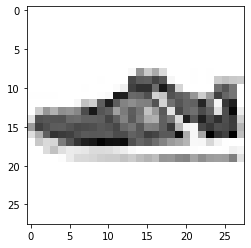

[[0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
  1. 1. 1. 0. 1. 0. 1. 1.]]


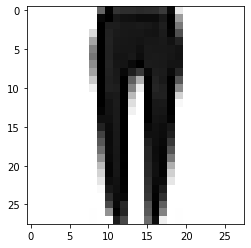

[[0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1.]]


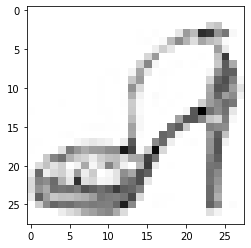

[[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00 1.000000e+00 1.000000e+00 5.573043e-30 1.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00]]


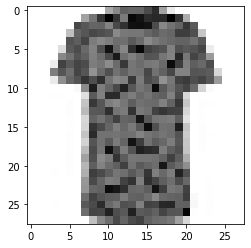

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


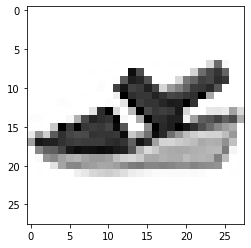

[[0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 0. 1. 1. 1. 1. 1. 1.]]


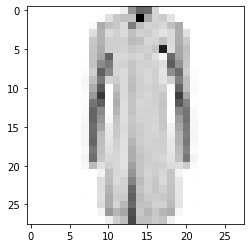

[[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


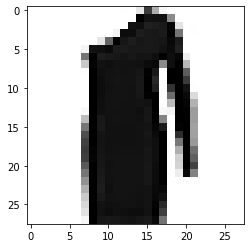

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1.]]


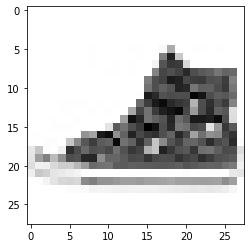

[[0.         0.         0.         0.01229602 1.         0.
  0.         1.         0.         1.         0.         1.
  0.         0.         1.         1.         1.         0.
  0.         0.         1.         0.         1.         1.
  0.         0.         1.         1.         1.         1.
  1.         1.        ]]


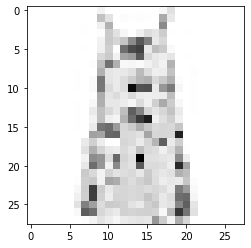

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1.]]


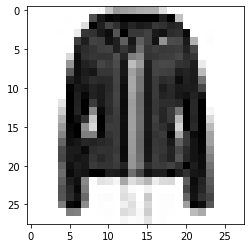

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


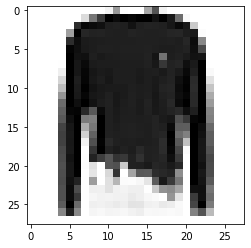

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


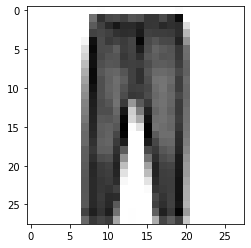

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 0. 1. 1. 1. 1.]]


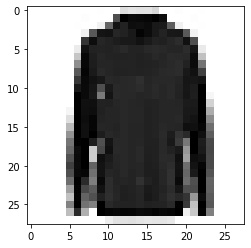

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


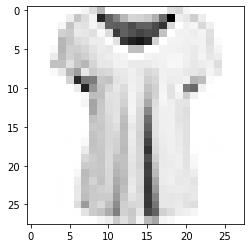

[[0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]]


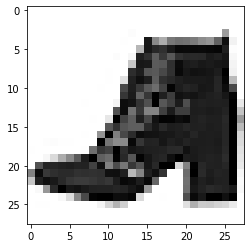

[[0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


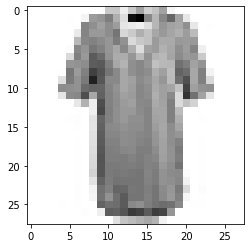

[[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


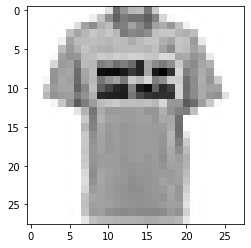

[[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 1. 1. 1.]]


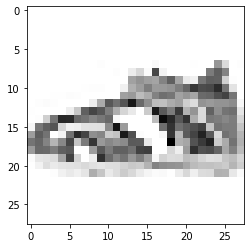

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  5.7044217e-11 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00]]


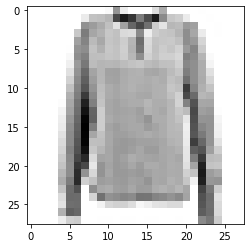

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  0. 1. 1. 1. 1. 0. 1. 1.]]


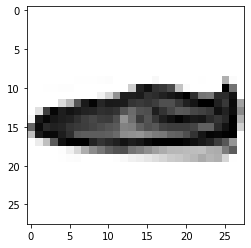

[[0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
  0. 1. 1. 0. 1. 0. 1. 1.]]


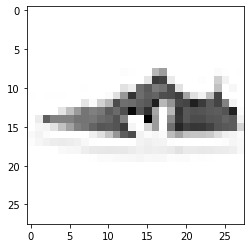

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  2.9773743e-37 1.0000000e+00]]


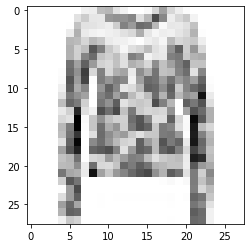

[[0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]]


In [27]:
# pick some images
images = all_images[0:50]
# run it though the autoencoder
for any_image in images:
    output_any_image = sess.run(output_layer,\
                   feed_dict={input_layer:[any_image]})
# run it though just the encoder
    encoded_any_image = sess.run(layer_1,\
                   feed_dict={input_layer:[any_image]})
# print the original image
    plt.imshow(any_image.reshape(28,28),  cmap='Greys')
    plt.show()
# print the encoding
    print(encoded_any_image)